In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 2. Data and Sampling Distributions

The proliferation of data of varying quality and relevance reinforces the needs for sampling as a tool to work efficiently with a variety of data and to minimize bias. Even in a big data project, predictive models are typically developed and piloted with samples.

#### Random sampling and sample bias

Random sampling is a process in which each available member of the population being sampled has an equal change of being chosen for the sample at each draw. Data quality often matter more than data quantity when making an estimate or a model based on a sample.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Sample</td>
        <td>A subset from a larger data set.</td>
    </tr>
    <tr>
        <td>Population</td>
        <td>The larger data set or idea of a data set.</td>
    </tr>
    <tr>
        <td>N (n)</td>
        <td>The size of the population (sample).</td>
    </tr>
    <tr>
        <td>Random sampling</td>
        <td>Drawing elements into a sample at random.</td>
    </tr>
    <tr>
        <td>Stratified sampling</td>
        <td>Dividing the population into strata and randomly sampling from each strata.</td>
    </tr>
    <tr>
        <td>Stratum (pl., strata)</td>
        <td>A homogeneous subgroup of a population with common characteristics.</td>
    </tr>
    <tr>
        <td>Simple random sample</td>
        <td>The sample that results from random sampling withou stratifying the population.</td>
    </tr>
    <tr>
        <td>Bias</td>
        <td>Systematic error.</td>
    </tr>
    <tr>
        <td>Sample bias</td>
        <td>A sample that misrepresents the population.</td>
    </tr>
</table>

#### Bias

Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process. An important distinction should be made between errors due to random chance and errors due to bias. An unbiased process will produce error, but it is random and does not tend strongly in any direction.

#### Selection bias

Selection bias refers to the practice of selectively choosing data - consciouly or unconsciously - in a way that leads to a conclusion that is misleading or ephemeral.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Selection bias</td>
        <td>Bias resulting from the way in which observations are selected.</td>
    </tr>
    <tr>
        <td>Data snooping</td>
        <td>Extensive hunting through data in search of something interesting.</td>
    </tr>
    <tr>
        <td>Vast search effect</td>
        <td>Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.</td>
    </tr>
    
</table>

#### Regression to the mean

Regression to the mean, meaning to "go back", is distinct from the statistical modeling method of linear regression, in which a linear relationship is estimated between predictor variables and an outcome variable.

#### Sampling distribution of a statistic

The term _sampling distribution_ of a statistic refers to the distribution of some sample statistic  over many samples drawn from the same population. Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Sample statistic</td>
        <td>A metric calculated for a sample of data drawn from a larger population.</td>
    </tr>
    <tr>
        <td>Data distribution</td>
        <td>The frequency distribution of individual <i>values</i> in a dataset.</td>
    </tr>
    <tr>
        <td>Sampling distribution</td>
        <td>The frequency distribution of a <i>sample statistic</i> over many samples or resamples.</td>
    </tr>
    <tr> 
        <td>Central limit theorem</td>
        <td>The tendency of sampling distribution to take on a normal shape as sample size rises.</td>
    </tr>
    <tr> 
        <td>Standard error</td>
        <td>The variability (standard deviation) of a sample <i>statistic</i> over many samples (not to be confused with <i>standard deviation</i>, which by itself, refers to variability of individuals data <i>values</i></td>
    </tr>
</table>

In [3]:
# Load loan_income
df_loan_income = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/loans_income.csv')
df_loan_income.tail()

,x
49995,40000
49996,54000
49997,50000
49998,82000
49999,70000


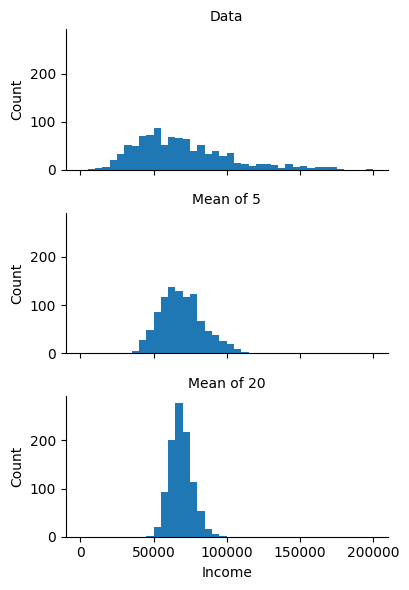

In [4]:
import seaborn as sns

sample_data = pd.DataFrame({
	'income': df_loan_income['x'].sample(1000),
	'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
	'income': [df_loan_income['x'].sample(5).mean() for _ in range(1000)],
	'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
	'income': [df_loan_income['x'].sample(20).mean() for _ in range(1000)],
	'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

#### The bootstrap

A way to estimate the sampling distribution of a statistics, or of a model, drawing additional, with replacement, from the sample itself and recalculate the statistics or model for each resample. It does not necessarily involves any assumptions about the data or the sample statistics being normally distributed.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Bootstrap sample</td>
        <td>A sample taken with replacement from an observed data set.</td>
    </tr>
    <tr>
        <td>Resampling</td>
        <td>The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.</td>
    </tr>
</table>

In [5]:
from sklearn.utils import resample

results = []
for i in range(1000):
	sample = resample(df_loan_income)
	results.append(sample.x.median())
results = pd.Series(results)
print('Bootstrap statistics')
print(f'Original: {df_loan_income.x.median()}')
print(f'Bias: {results.mean() - df_loan_income.x.median()}')
print(f'Std: {results.std()}')

Bootstrap statistics
Original: 62000.0
Bias: -79.15350000000035
Std: 223.78615893902528


#### Confidence intervals

Another way to understand the pontential error in a sample estimate.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Confidence level</td>
        <td>The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest</td>
    </tr>
    <tr>
        <td>Interval endpoints</td>
        <td>The top and bottom of the confidence interval.</td>
    </tr>
</table>


#### Normal distribution

The bell-shaped normal distribution is iconic in traditional statistics. The fact that distribution of sample statistics are often normally shaped has made it powerful tool in the development of mathematical formulas that approximate those distributions.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Error</td>
        <td>The difference between a data point and a predicted or average value.</td>
    </tr>
    <tr>
        <td>Standardize</td>
        <td>Subtract the mean and divide by the standard deviation.</td>
    </tr>
    <tr>
        <td>z-score</td>
        <td>The result of standardizing and individual data point.</td>
    </tr>
    <tr>
        <td>Standard normal</td>
        <td>A normal distribution with mean=0  and standard deviation=1</td>
    </tr>
    <tr>
        <td>QQ-Plot</td>
        <td>A plot to visualize how close a sample distritbution is to a specified ditribution. e.g, the normal distribution</td>
    </tr>
</table>

In a normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within 2 standard deviations.


#### Standard Normal and QQ-Plots

A _standard normal_ distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation; this is also called _normalization_ or _standardization_.

A _QQ-Plot_ is used to visually determine how close a sample is to a specified distribution - in this case, the normal distribution. The QQ-Plot orders the _z-scores_ from low to high and plots each value's _z-score_ on the y-axis. the x-axis is the corresponding quantile of a normal distribution for that value's rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the poitns roughly fall on the diagonal line, then the sample distribution can be considered close to a normal.

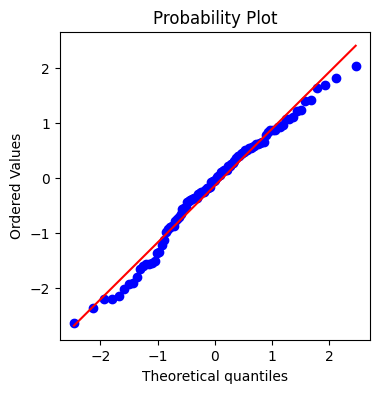

In [6]:
# Use scipy.stats.probplot to create the QQ-Plot
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.show()

#### Long-Tailed Distributions

Despite the importance of the normal distribution historically in statistics, and in contrast to what the name would suggest, data is generally not normally distribute.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Tail</td>
        <td>The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.</td>
    </tr>
    <tr>
        <td>Skew</td>
        <td>Where one tail of a distribution is longer than the other.</td>
    </tr>
</table>

The tails of a distribution correspond to the extreme values (small or large). Long tails, and guarding against them, are widely recognized in practical work. A googd example to illustrate the long-tailed nature of data is stocks returns.

In [7]:
sp500_px = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/refs/heads/master/data/sp500_data.csv.gz')
sp500_px.tail()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
5642,2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
5643,2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
5644,2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
5645,2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001
5646,2015-07-01,-1.210022,0.020000,-0.009998,0.869995,0.329998,-0.190003,-0.039999,0.520004,-0.030000,...,-0.250000,1.270005,0.050003,-1.380001,-2.910003,1.180000,-2.099999,-8.719970,2.080001,0.940002


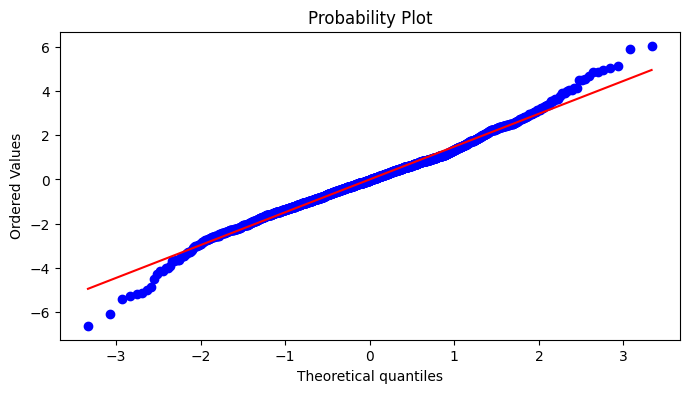

In [8]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(8,4))
stats.probplot(nflx, plot=ax)
plt.show()

#### Student's t-Distribution

The _t-distribution_ is a normally shaped distribution, except that it is a bit thicker and longer on the tails. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distribution that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>n</td>
        <td>Sample size</td>
    </tr>
    <tr>
        <td>Degrees of freedom</td>
        <td>A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups.</td>
    </tr>
</table>

#### Binomial Distribution

Yes/no (binomial) outcomes lie at the hear of analytics since they are often the culmination of a decision or other process; buy/don't buy, click/don't click, survive/die, and so on. Central to understanding the binomial distribution is the idea of a set of _trials_, each having two possible outcomes with definite probabilities.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Triel</td>
        <td>And event with a discrete outcome (e.g., a coin flip)</td>
    </tr>
    <tr>
        <td>Success</td>
        <td>The outcome of interes for a trial</td>
    </tr>
    <tr>
        <td>Binomial</td>
        <td>Having two outcomet.</td>
    </tr>
    <tr>
        <td>Binomail trial</td>
        <td>A trial with two outcomes</td>
    </tr>
    <tr>
        <td>Binomial distribution</td>
        <td>Distribution of number of successes in x trials (Bernoulli distribution)</td>
    </tr>
</table>

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p) of sucess in each trial.


In [16]:
# The probability of observing x=2 successes in size=5 trials where the probabilty
# of success for each trial is p=0.1
print("Probability of x in n trials: {:.3f}".format(stats.binom.pmf(2, n=5, p=0.1)))

# The probability of x or fewer successes in n trial
print("Probability of x or fewer in n triasl: {:.3f}".format(stats.binom.cdf(2, n=5, p=0.1)))


Probability of x in n trials: 0.073
Probability of x or fewer in n triasl: 0.991


#### Chi-Square Distribution

The chi-square statistic is a measure of the extent to which a set of observed values "fits" a specified distribution (a "goodness-of-fit" test).

The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model. A low chi-quare value for a set of counts indicates that they closely follow the expected distribution. A high chi-square indicates that they differ markedly from what is expected.